In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta
import seaborn as sns


In [2]:
df  = pd.read_csv('0050top10.csv')
df.head()

,Unnamed: 0,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,stock_code
0,0,2022-01-03 00:00:00,73703302.0,4.624972e+10,619.0,632.0,618.0,631.0,+16.00,88508.0,2330
1,1,2022-01-04 00:00:00,90945643.0,5.918820e+10,645.0,656.0,644.0,656.0,+25.00,106409.0,2330
2,2,2022-01-05 00:00:00,72505550.0,4.758283e+10,669.0,669.0,646.0,650.0,-6.00,64712.0,2330
3,3,2022-01-06 00:00:00,57490736.0,3.681764e+10,638.0,646.0,636.0,644.0,-6.00,53430.0,2330
4,4,2022-01-07 00:00:00,39847766.0,2.535824e+10,643.0,646.0,632.0,634.0,-10.00,44497.0,2330


In [3]:
df.columns = ['unname','time', 'deal_unit', 'deal_amount', 'open', 'high', 'low', 'close', 'pct_change', 'transaction_volume','stock_code']
df = df.drop(columns=['unname'])
df.head()


,time,deal_unit,deal_amount,open,high,low,close,pc_change,transaction_volume,stock_code
0,2022-01-03 00:00:00,73703302.0,4.624972e+10,619.0,632.0,618.0,631.0,+16.00,88508.0,2330
1,2022-01-04 00:00:00,90945643.0,5.918820e+10,645.0,656.0,644.0,656.0,+25.00,106409.0,2330
2,2022-01-05 00:00:00,72505550.0,4.758283e+10,669.0,669.0,646.0,650.0,-6.00,64712.0,2330
3,2022-01-06 00:00:00,57490736.0,3.681764e+10,638.0,646.0,636.0,644.0,-6.00,53430.0,2330
4,2022-01-07 00:00:00,39847766.0,2.535824e+10,643.0,646.0,632.0,634.0,-10.00,44497.0,2330


In [4]:
df_2330 = df[df['stock_code'] == 2330]  
df_2330

,time,deal_unit,deal_amount,open,high,low,close,pc_change,transaction_volume,stock_code
0,2022-01-03 00:00:00,73703302.0,4.624972e+10,619.0,632.0,618.0,631.0,+16.00,88508.0,2330
1,2022-01-04 00:00:00,90945643.0,5.918820e+10,645.0,656.0,644.0,656.0,+25.00,106409.0,2330
2,2022-01-05 00:00:00,72505550.0,4.758283e+10,669.0,669.0,646.0,650.0,-6.00,64712.0,2330
3,2022-01-06 00:00:00,57490736.0,3.681764e+10,638.0,646.0,636.0,644.0,-6.00,53430.0,2330
4,2022-01-07 00:00:00,39847766.0,2.535824e+10,643.0,646.0,632.0,634.0,-10.00,44497.0,2330
...,...,...,...,...,...,...,...,...,...,...
656,2024-09-18 00:00:00,30094662.0,2.830305e+10,945.0,948.0,933.0,941.0,-6.00,46622.0,2330
657,2024-09-19 00:00:00,35254383.0,3.348277e+10,940.0,960.0,936.0,960.0,+19.00,53494.0,2330
658,2024-09-20 00:00:00,66762167.0,6.510534e+10,981.0,982.0,971.0,973.0,+13.00,67911.0,2330
659,2024-09-23 00:00:00,15399658.0,1.501392e+10,971.0,977.0,971.0,977.0,+4.00,26106.0,2330


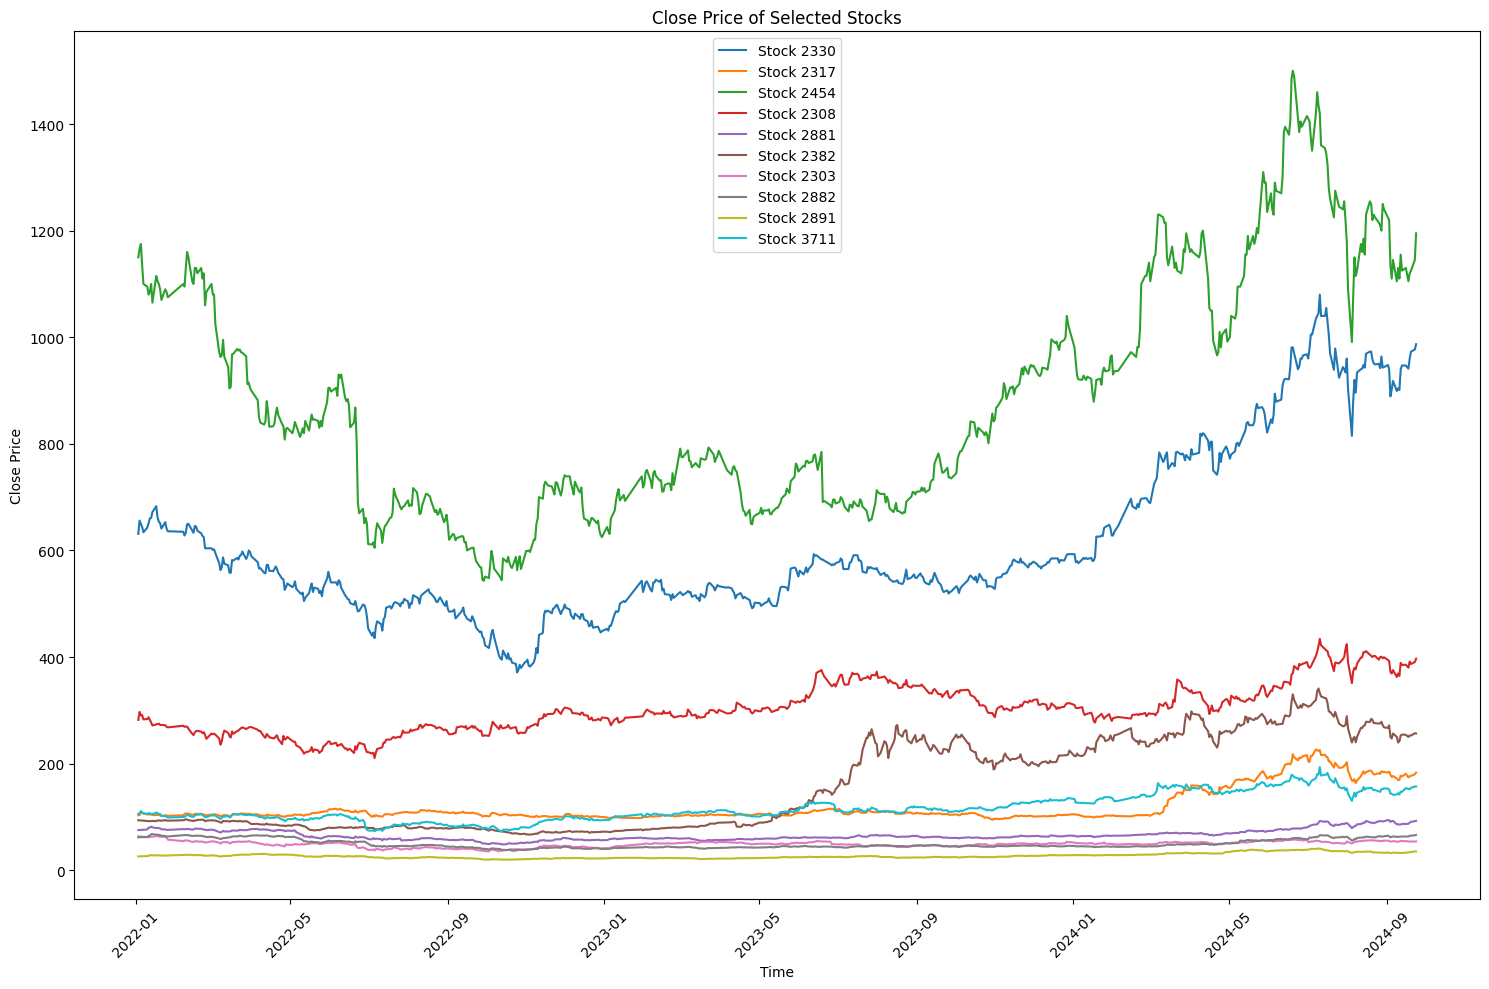

In [5]:
# stock_code_list = ['2330', '2317', '2454', '2308', '2881', '2382', '2303', '2882', '2891', '3711']

import matplotlib.pyplot as plt
import pandas as pd

# 確保 'time' 欄位是 datetime 格式
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# 刪除 'time' 欄位中含有 NaT 的行
df = df.dropna(subset=['time'])

# 定義要繪圖的股票代碼列表
stock_code_list = ['2330', '2317', '2454', '2308', '2881', '2382', '2303', '2882', '2891', '3711']
stock_code_list = [int(code) for code in stock_code_list]


# 設置圖表大小
plt.figure(figsize=(15, 10))

# 遍歷每個股票代碼，過濾相應數據並繪圖
for stock_code in stock_code_list:
    # 過濾出該股票代碼的數據
    df_filtered = df[df['stock_code'] == stock_code]
    
    # 檢查過濾後的數據是否為空，避免錯誤
    if not df_filtered.empty:
        # 繪製該股票的收盤價
        plt.plot(df_filtered['time'], df_filtered['close'], label=f'Stock {stock_code}')

# 設置 x 軸和 y 軸標籤
plt.xlabel('Time')
plt.ylabel('Close Price')

# 設置圖表標題
plt.title('Close Price of Selected Stocks')

# 顯示圖例
plt.legend()

# 設置 x 軸的標籤旋轉角度
plt.xticks(rotation=45)

# 自動調整子圖參數，以防止標籤重疊
plt.tight_layout()

# 顯示圖表
plt.show()



### Finding potential Coint pairs 

In [6]:
import pandas as pd
import numpy as np
import itertools
from statsmodels.tsa.stattools import coint

# Assume df is your DataFrame containing stock prices with 'time', 'close', and 'stock_code' columns

# List of stock codes (assumed to be integers in df)
stock_code_list = [2330, 2317, 2454, 2308, 2881, 2382, 2303, 2882, 2891, 3711]

# Convert stock_code to string for proper filtering (if needed)
df['stock_code'] = df['stock_code'].astype(str)

# Prepare a dictionary to store stock data
stock_data = {}
for stock_code in stock_code_list:
    stock_data[stock_code] = df[df['stock_code'] == str(stock_code)].set_index('time')['close']

# Combine all stock prices into a single DataFrame, aligning on 'time'
combined_df = pd.DataFrame(stock_data)

# Drop rows with any NaN values to ensure all stocks have data for the same dates
combined_df.dropna(inplace=True)

# List to store pairs that pass the cointegration test
cointegrated_pairs = []

# Iterate over all unique pairs of stocks
for (stock1, stock2) in itertools.combinations(stock_code_list, 2):
    # Perform cointegration test
    score, p_value, _ = coint(combined_df[stock1], combined_df[stock2])
    
    # If p-value is less than 0.05, we consider the pair cointegrated
    if p_value < 0.05:
        cointegrated_pairs.append((stock1, stock2, p_value))

# Display the cointegrated pairs
if cointegrated_pairs:
    for pair in cointegrated_pairs:
        print(f"Pair {pair[0]} and {pair[1]} is cointegrated with p-value {pair[2]:.4f}")
else:
    print("No cointegrated pairs found.")


Pair 2454 and 2891 is cointegrated with p-value 0.0014
Pair 2303 and 2891 is cointegrated with p-value 0.0097
Pair 2303 and 3711 is cointegrated with p-value 0.0031


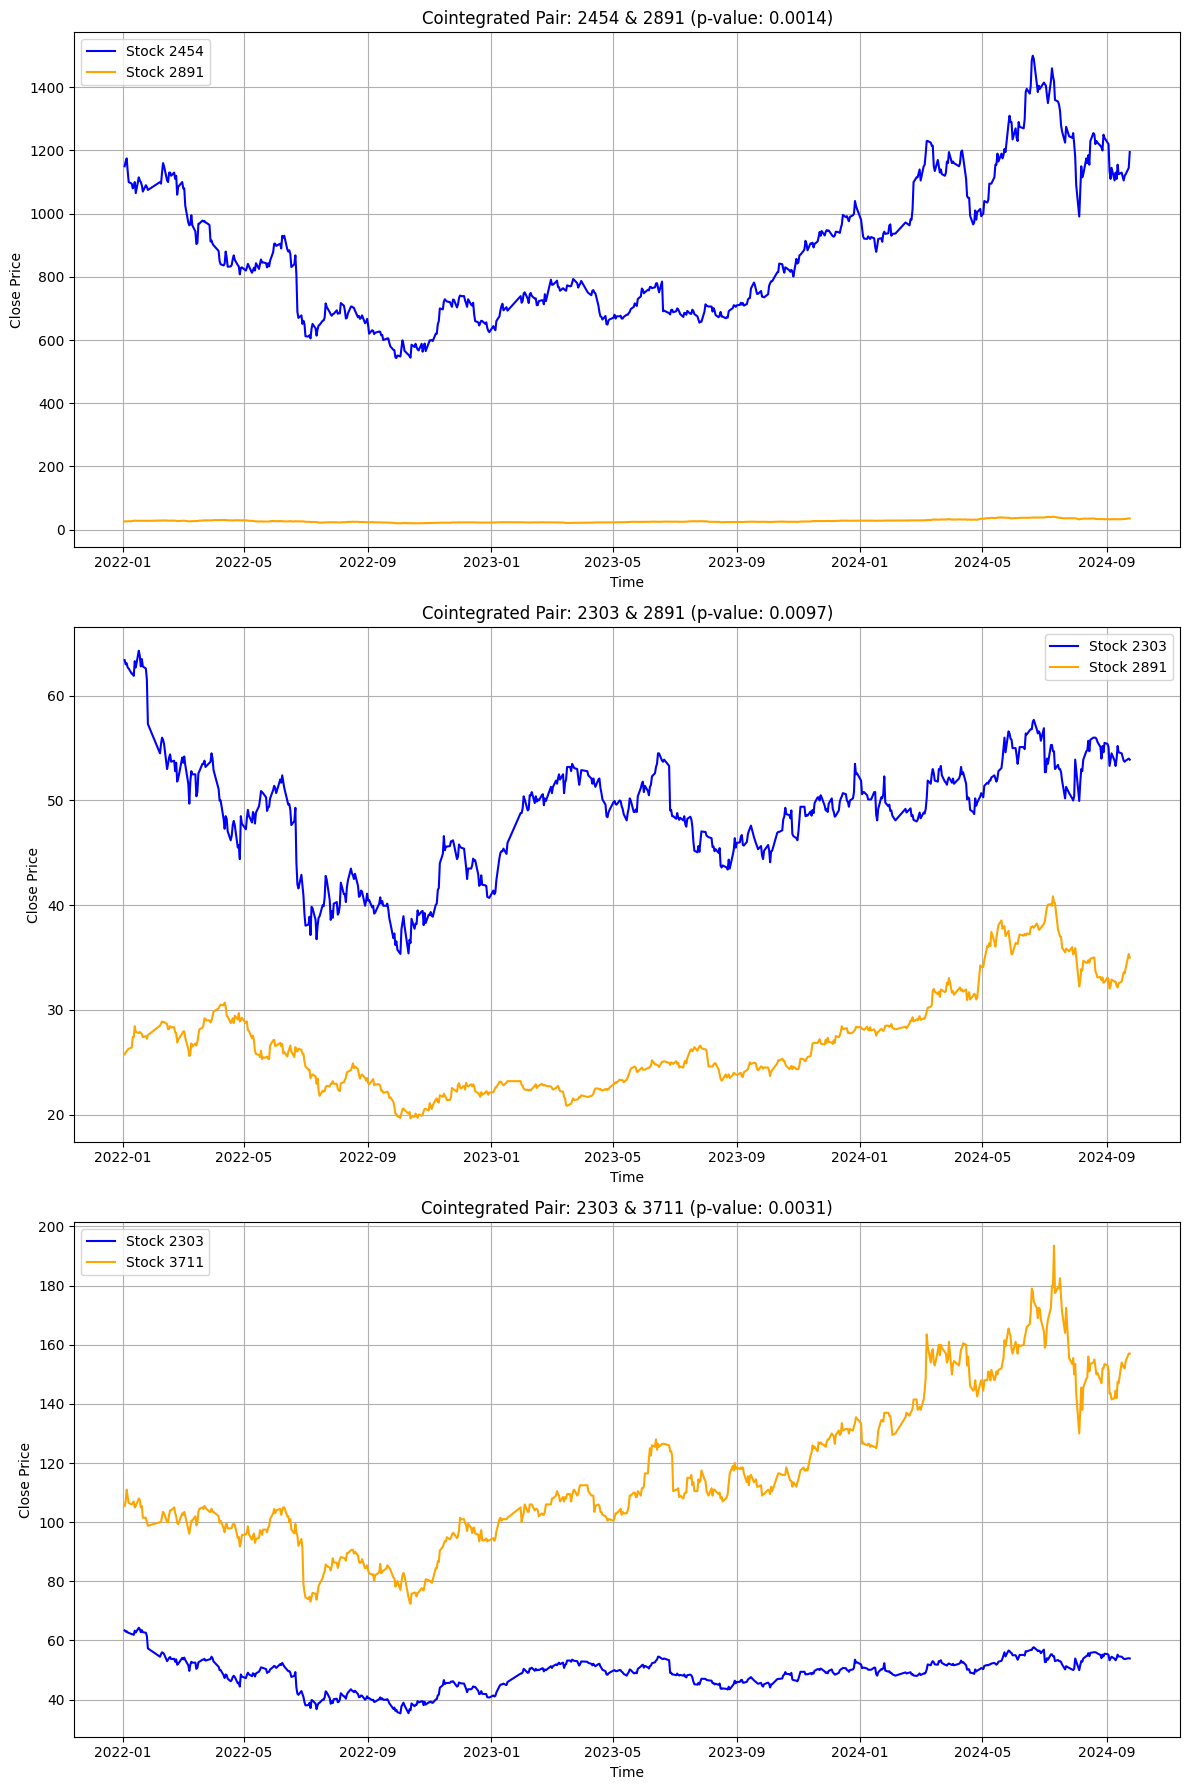

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dictionary of found cointegrated pairs with their p-values
cointegrated_pairs = [
    (2454, 2891, 0.0014),
    (2303, 2891, 0.0097),
    (2303, 3711, 0.0031)
]

# Convert 'stock_code' to string if needed
df['stock_code'] = df['stock_code'].astype(str)

# Create a figure with three subplots
fig, axs = plt.subplots(len(cointegrated_pairs), 1, figsize=(12, 18))

# Plot each cointegrated pair
for i, (stock1, stock2, p_value) in enumerate(cointegrated_pairs):
    # Filter data for the two stocks
    df_stock1 = df[df['stock_code'] == str(stock1)].set_index('time')['close']
    df_stock2 = df[df['stock_code'] == str(stock2)].set_index('time')['close']
    
    # Join the two series on time index to ensure aligned time points
    pair_data = pd.concat([df_stock1, df_stock2], axis=1).dropna()
    pair_data.columns = [f'Stock {stock1}', f'Stock {stock2}']
    
    # Plot the closing prices of the two stocks
    axs[i].plot(pair_data.index, pair_data[f'Stock {stock1}'], label=f'Stock {stock1}', color='blue')
    axs[i].plot(pair_data.index, pair_data[f'Stock {stock2}'], label=f'Stock {stock2}', color='orange')
    
    # Add labels and title
    axs[i].set_title(f'Cointegrated Pair: {stock1} & {stock2} (p-value: {p_value:.4f})')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Close Price')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
# Show the plot
plt.show()


### analyze averge day + , - % 

In [8]:
# Define the list of stock codes
stock_code_list = ['2330', '2317', '2454', '2308', '2881', '2382', '2303', '2882', '2891', '3711']

# Create a dictionary to store DataFrames for each stock code
df_dict = {code: df[df['stock_code'] == code] for code in stock_code_list}

# Now df_dict['2330'] will give you the DataFrame for stock code 2330, and so on.


In [9]:
df_dict['2330']

,time,deal_unit,deal_amount,open,high,low,close,pc_change,transaction_volume,stock_code
0,2022-01-03,73703302.0,4.624972e+10,619.0,632.0,618.0,631.0,+16.00,88508.0,2330
1,2022-01-04,90945643.0,5.918820e+10,645.0,656.0,644.0,656.0,+25.00,106409.0,2330
2,2022-01-05,72505550.0,4.758283e+10,669.0,669.0,646.0,650.0,-6.00,64712.0,2330
3,2022-01-06,57490736.0,3.681764e+10,638.0,646.0,636.0,644.0,-6.00,53430.0,2330
4,2022-01-07,39847766.0,2.535824e+10,643.0,646.0,632.0,634.0,-10.00,44497.0,2330
...,...,...,...,...,...,...,...,...,...,...
656,2024-09-18,30094662.0,2.830305e+10,945.0,948.0,933.0,941.0,-6.00,46622.0,2330
657,2024-09-19,35254383.0,3.348277e+10,940.0,960.0,936.0,960.0,+19.00,53494.0,2330
658,2024-09-20,66762167.0,6.510534e+10,981.0,982.0,971.0,973.0,+13.00,67911.0,2330
659,2024-09-23,15399658.0,1.501392e+10,971.0,977.0,971.0,977.0,+4.00,26106.0,2330


### Calculate weighted average rise, fall and std 

In [10]:
import pandas as pd
from prettytable import PrettyTable

# Define the list of stock codes
stock_code_list = ['2330', '2317', '2454', '2308', '2881', '2382', '2303', '2882', '2891', '3711']

# Create an empty list to store the results
results = []

# Iterate through each stock code and calculate metrics
for stock_code in stock_code_list:
    # Filter data for the specific stock code and sort by time
    df_stock = df[df['stock_code'] == stock_code].sort_values(by='time')

    # Calculate daily percentage change
    df_stock['daily_change_pct'] = df_stock['close'].pct_change() * 100

    # Filter positive changes (rises)
    df_rises = df_stock[df_stock['daily_change_pct'] > 0]
    # Calculate weighted average rise based on transaction volume
    weighted_average_rise = (df_rises['daily_change_pct'] * df_rises['transaction_volume']).sum() / df_rises['transaction_volume'].sum() if not df_rises.empty else 0
    # Calculate standard deviation for rises
    std_rise = df_rises['daily_change_pct'].std() if not df_rises.empty else 0

    # Calculate probability distribution for rises
    rise_within_1_std = ((df_rises['daily_change_pct'] >= weighted_average_rise - std_rise) & 
                         (df_rises['daily_change_pct'] <= weighted_average_rise + std_rise)).mean() * 100
    rise_within_2_std = ((df_rises['daily_change_pct'] >= weighted_average_rise - 2 * std_rise) & 
                         (df_rises['daily_change_pct'] <= weighted_average_rise + 2 * std_rise)).mean() * 100
    rise_within_3_std = ((df_rises['daily_change_pct'] >= weighted_average_rise - 3 * std_rise) & 
                         (df_rises['daily_change_pct'] <= weighted_average_rise + 3 * std_rise)).mean() * 100

    # Filter negative changes (falls)
    df_falls = df_stock[df_stock['daily_change_pct'] < 0]
    # Calculate weighted average fall based on transaction volume
    weighted_average_fall = (df_falls['daily_change_pct'] * df_falls['transaction_volume']).sum() / df_falls['transaction_volume'].sum() if not df_falls.empty else 0
    # Calculate standard deviation for falls
    std_fall = df_falls['daily_change_pct'].std() if not df_falls.empty else 0

    # Calculate probability distribution for falls
    fall_within_1_std = ((df_falls['daily_change_pct'] >= weighted_average_fall - std_fall) & 
                         (df_falls['daily_change_pct'] <= weighted_average_fall + std_fall)).mean() * 100
    fall_within_2_std = ((df_falls['daily_change_pct'] >= weighted_average_fall - 2 * std_fall) & 
                         (df_falls['daily_change_pct'] <= weighted_average_fall + 2 * std_fall)).mean() * 100
    fall_within_3_std = ((df_falls['daily_change_pct'] >= weighted_average_fall - 3 * std_fall) & 
                         (df_falls['daily_change_pct'] <= weighted_average_fall + 3 * std_fall)).mean() * 100

    # Append the results for the current stock to the list
    results.append({
        'Stock Code': stock_code,
        'Weighted Average Rise (%)': weighted_average_rise,
        'Std of Rise (%)': std_rise,
        'Rise within 1 Std (%)': rise_within_1_std,
        'Rise within 2 Std (%)': rise_within_2_std,
        'Rise within 3 Std (%)': rise_within_3_std,
        'Weighted Average Fall (%)': weighted_average_fall,
        'Std of Fall (%)': std_fall,
        'Fall within 1 Std (%)': fall_within_1_std,
        'Fall within 2 Std (%)': fall_within_2_std,
        'Fall within 3 Std (%)': fall_within_3_std
    })

# Convert the results list to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Create a PrettyTable object to display the results
table = PrettyTable()

# Define headers for the PrettyTable
table.field_names = ['Stock Code', 'Weighted Avg Rise (%)', 'Std of Rise (%)', 'Rise within 1 Std (%)', 
                     'Rise within 2 Std (%)', 'Rise within 3 Std (%)', 'Weighted Avg Fall (%)', 
                     'Std of Fall (%)', 'Fall within 1 Std (%)', 'Fall within 2 Std (%)', 
                     'Fall within 3 Std (%)']

# Add rows to the table
for result in results:
    table.add_row([
        result['Stock Code'],
        f"{result['Weighted Average Rise (%)']:.2f}%",
        f"{result['Weighted Average Fall (%)']:.2f}%",

        f"{result['Std of Rise (%)']:.2f}%",
        f"{result['Std of Fall (%)']:.2f}%",

        f"{result['Rise within 1 Std (%)']:.2f}%",
        f"{result['Fall within 1 Std (%)']:.2f}%",

        f"{result['Rise within 2 Std (%)']:.2f}%",
        f"{result['Fall within 2 Std (%)']:.2f}%",

        f"{result['Rise within 3 Std (%)']:.2f}%",
        f"{result['Fall within 3 Std (%)']:.2f}%"
    ])

# Print the table
print(table)


+------------+-----------------------+-----------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------+-----------------------+-----------------------+-----------------------+
| Stock Code | Weighted Avg Rise (%) | Std of Rise (%) | Rise within 1 Std (%) | Rise within 2 Std (%) | Rise within 3 Std (%) | Weighted Avg Fall (%) | Std of Fall (%) | Fall within 1 Std (%) | Fall within 2 Std (%) | Fall within 3 Std (%) |
+------------+-----------------------+-----------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------+-----------------------+-----------------------+-----------------------+
|    2330    |         2.19%         |      -2.45%     |         1.42%         |         1.25%         |         54.55%        |         39.74%        |      97.49%     |         98.05%        |         98.12%        |         99.02%        |
|    2317    |         2.40%

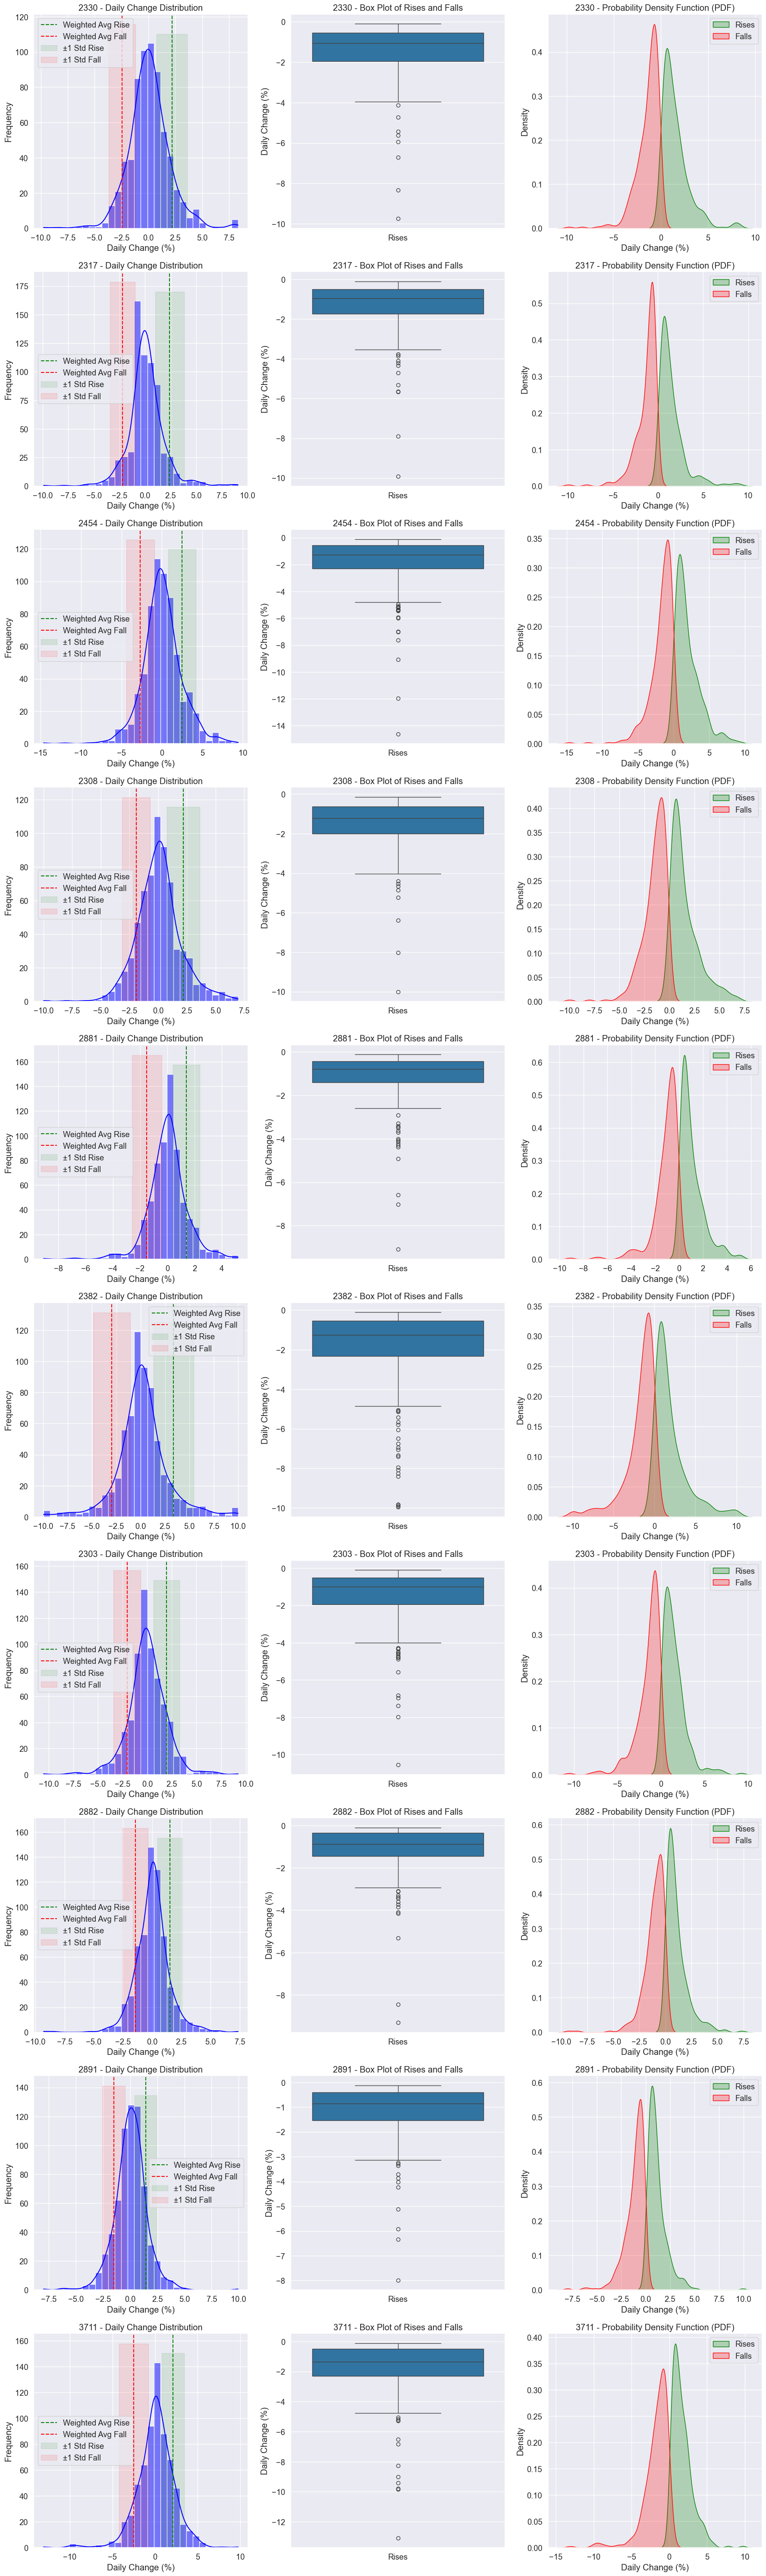

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warning = warnings.filterwarnings('ignore')

# Define the list of stock codes
# Change here to see the different 
stock_code_list = ['2330', '2317', '2454', '2308', '2881', '2382', '2303', '2882', '2891', '3711']

# Set the style and context manually
sns.set_style("darkgrid")  # Choose style: "darkgrid", "whitegrid", "dark", "white", or "ticks"
sns.set_context("notebook", font_scale=1.2)  

# Define subplots based on the number of stock codes
num_stocks = len(stock_code_list)

# Create subplots
fig, axes = plt.subplots(num_stocks, 3, figsize=(18, 6 * num_stocks))
fig.subplots_adjust(hspace=0.4)

# If only one stock, axes is not a 2D array, so we need to convert it to a list of lists
if num_stocks == 1:
    axes = [axes]

# Iterate through each stock code and visualize the data
for idx, stock_code in enumerate(stock_code_list):
    # Filter data for the specific stock code and sort by time
    df_stock = df[df['stock_code'] == stock_code].sort_values(by='time')

    # Calculate daily percentage change
    df_stock['daily_change_pct'] = df_stock['close'].pct_change() * 100

    # Filter positive and negative changes
    df_rises = df_stock[df_stock['daily_change_pct'] > 0]
    df_falls = df_stock[df_stock['daily_change_pct'] < 0]

    # Weighted average and standard deviation calculations for rises and falls
    weighted_average_rise = (df_rises['daily_change_pct'] * df_rises['transaction_volume']).sum() / df_rises['transaction_volume'].sum() if not df_rises.empty else 0
    std_rise = df_rises['daily_change_pct'].std() if not df_rises.empty else 0
    weighted_average_fall = (df_falls['daily_change_pct'] * df_falls['transaction_volume']).sum() / df_falls['transaction_volume'].sum() if not df_falls.empty else 0
    std_fall = df_falls['daily_change_pct'].std() if not df_falls.empty else 0

    # Histogram for daily changes
    ax1 = axes[idx, 0] if num_stocks > 1 else axes[0]
    sns.histplot(df_stock['daily_change_pct'].dropna(), bins=30, kde=True, color='blue', ax=ax1)
    ax1.axvline(weighted_average_rise, color='green', linestyle='--', label='Weighted Avg Rise')
    ax1.axvline(weighted_average_fall, color='red', linestyle='--', label='Weighted Avg Fall')
    ax1.fill_betweenx([0, ax1.get_ylim()[1]], weighted_average_rise - std_rise, weighted_average_rise + std_rise, color='green', alpha=0.1, label='±1 Std Rise')
    ax1.fill_betweenx([0, ax1.get_ylim()[1]], weighted_average_fall - std_fall, weighted_average_fall + std_fall, color='red', alpha=0.1, label='±1 Std Fall')
    ax1.set_title(f'{stock_code} - Daily Change Distribution')
    ax1.set_xlabel('Daily Change (%)')
    ax1.set_ylabel('Frequency')
    ax1.legend()

    # Box plot for rises and falls
    ax2 = axes[idx, 1] if num_stocks > 1 else axes[1]
    sns.boxplot(data=[df_rises['daily_change_pct'].dropna(), df_falls['daily_change_pct'].dropna()], ax=ax2)
    ax2.set_xticklabels(['Rises', 'Falls'])
    ax2.set_title(f'{stock_code} - Box Plot of Rises and Falls')
    ax2.set_ylabel('Daily Change (%)')

    # Probability Density Function (PDF) for rises and falls
    ax3 = axes[idx, 2] if num_stocks > 1 else axes[2]
    sns.kdeplot(df_rises['daily_change_pct'].dropna(), ax=ax3, color='green', fill=True, label='Rises')
    sns.kdeplot(df_falls['daily_change_pct'].dropna(), ax=ax3, color='red', fill=True, label='Falls')
    ax3.set_title(f'{stock_code} - Probability Density Function (PDF)')
    ax3.set_xlabel('Daily Change (%)')
    ax3.set_ylabel('Density')
    ax3.legend()

# Show the plots
plt.tight_layout()
plt.show()
